# Ejercicio Práctico de Koalas

In [1]:
import findspark
findspark.init()

import pandas as pd
import pyspark

In [2]:
import numpy as np
import pandas as pd
import databricks.koalas as ks

### Funciones básicas

In [3]:
pser = pd.Series([1, 3, 5, np.nan, 6, 8]) 

## Crea una serie de Koalas con [1, 3, 5, np.nan, 6, 8]

kser = ks.Series(pser)

## Pasa la serie de pandas pser a Koalas con el nombre de kser

In [4]:
## Ordena kser por el index

kser.sort_index(ascending=False)

5    8.0
4    6.0
3    NaN
2    5.0
1    3.0
0    1.0
dtype: float64

In [5]:
pdf = pd.DataFrame({'A': np.random.rand(5),
                    'B': np.random.rand(5)})

## Genera un Dataframe de Koalas con el pdf de pandas y llamalo kdf

In [6]:
kdf = ks.from_pandas(pdf)

### Visualización de datos

In [7]:
## Describe los datos de kdf
kdf.describe()

,A,B
count,5.000000,5.000000
mean,0.319159,0.381245
std,0.233906,0.268525
min,0.008165,0.020962
25%,0.204160,0.244068
50%,0.343243,0.352240
75%,0.402724,0.630741
max,0.637505,0.658214


In [8]:
## Ordena los datos de kdf por la columna B
kdf.sort_values(by='B')

,A,B
4,0.637505,0.020962
1,0.402724,0.244068
3,0.008165,0.352240
0,0.343243,0.630741
2,0.204160,0.658214


In [9]:
## Transpon los datos de kdf
kdf.T

,0,1,2,3,4
A,0.343243,0.402724,0.204160,0.008165,0.637505
B,0.630741,0.244068,0.658214,0.352240,0.020962


### Selección

In [10]:
## Selecciona las variables A y B de Kdf
kdf.loc[['A','B']]

,A,B


In [11]:
## Selecciona las filas 1, 2 de kdf
kdf.iloc[1:3]

,A,B
1,0.402724,0.244068
2,0.204160,0.658214


In [12]:
## Selecciona las filas 0, 1 y 2 de la variable B
kdf.iloc[0:3]['B']

0    0.630741
1    0.244068
2    0.658214
Name: B, dtype: float64

### Aplicando funciones de Python a Koalas

In [13]:
## Aplica la funcion de Python de np.cumsum a kdf
kdf_cumsum = kdf.apply(lambda col: col.cumsum() if np.issubdtype(col.dtype, np.number) else col)
kdf_cumsum

,A,B
0,0.343243,0.630741
1,0.745967,0.874809
2,0.950127,1.533023
3,0.958292,1.885263
4,1.595796,1.906225


In [14]:
## Eleva al cuadrado los valores de kdf
kdf_cuadrado = kdf.applymap(lambda x: x**2)
kdf_cuadrado

,A,B
0,0.117816,0.397835
1,0.162186,0.059569
2,0.041681,0.433246
3,0.000067,0.124073
4,0.406412,0.000439


### Agrupando datos

In [15]:
## Obten la suma de los valores al agrupar por A y por B
kdf.groupby(['A', 'B']).sum()

,
A,B
0.637505,0.020962
0.402724,0.244068
0.343243,0.630741
0.008165,0.352240
0.204160,0.658214


### Generando gráficos

In [16]:
# This is needed for visualizing plot on notebook
%matplotlib inline

<AxesSubplot:>

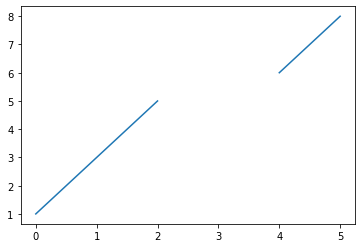

In [17]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']

kdf = ks.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)

## Genera un grafico de barras con kdf y matplotlib

ks.options.plotting.backend = "matplotlib"

kser.plot()

In [18]:
kdf = ks.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6, 3],
    'signups': [5, 5, 6, 12, 14, 13, 9],
    'visits': [20, 42, 28, 62, 81, 50, 90],
}, index=pd.date_range(start='2019/08/15', end='2020/03/09',
                       freq='M'))

## Genera un grafico de areas con kdf y matplotlib

ks.options.plotting.backend = "pandas_bokeh"

kdf.plot(backend="pandas_bokeh", title="Example Figure")
kser.plot()

Figure(id='1388', ...)

### Utilizando SQL en Koalas

In [19]:
kdf = ks.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'pig': [20, 18, 489, 675, 1776],
                    'horse': [4, 25, 281, 600, 1900]})

In [29]:
query_result = kdf.sql("SELECT * FROM {0} WHERE pig > 500".format(kdf.pig))
print(query_result)

AttributeError: 'DataFrame' object has no attribute 'sql'

In [ ]:
pdf = pd.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'sheep': [22, 50, 121, 445, 791],
                    'chicken': [250, 326, 589, 1241, 2118]})

In [ ]:
## Haz un inner join entre kdf y pdf en la vriable year, selecciona el pig y el chicken
## ordena los datos por pig y chicken
kdf_pdf = ks.DataFrame(pdf)

### Trabajando con PySpark

In [ ]:
kdf = ks.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})

## Convierete el dataframe de Koalas a Dataframe de Spark
type(kdf)

databricks.koalas.frame.DataFrame

In [ ]:
import databricks.koalas as ks
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.getOrCreate()
df_spark = kdf.to_spark()

In [ ]:
## muestra los datos
df_spark.show()

+---+---+
|  A|  B|
+---+---+
|  1| 10|
|  2| 20|
|  3| 30|
|  4| 40|
|  5| 50|
+---+---+

